# Check the correlations between the variables and start with a general data exploratory 

First import the necessary datasets and read the file(s)

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

In [3]:
df = pd.read_csv('hour.csv', index_col=0)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Dive into some exploratory data analysis

In [4]:
# check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


* there seem to be no null values
* the datetype of dteday is string, all other variables are either integers or floats

In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].describe()

count                   17379
unique                    731
top       2012-08-29 00:00:00
freq                       24
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

In [6]:
df.shape

(17379, 16)

In [7]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


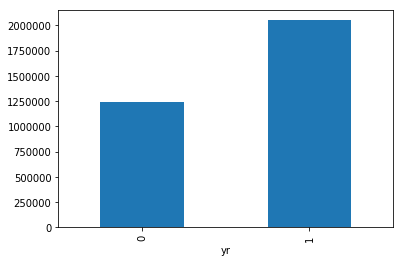

In [8]:
# look at the development of rentals over the years
df.groupby('yr')['cnt'].sum().plot.bar()

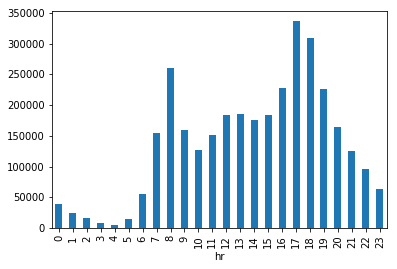

In [9]:
## look at the hourly rentals
df.groupby('hr')['cnt'].sum().plot.bar()

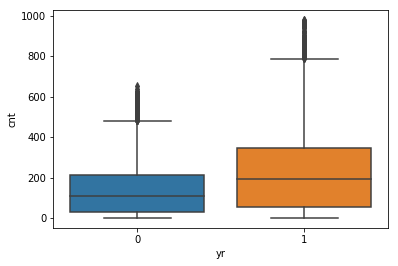

In [11]:
# let's look at a boxplot for cnt and year
sns.boxplot(x="yr", y="cnt", data=df)

* The number of rentals increased heavily from year one to year two 

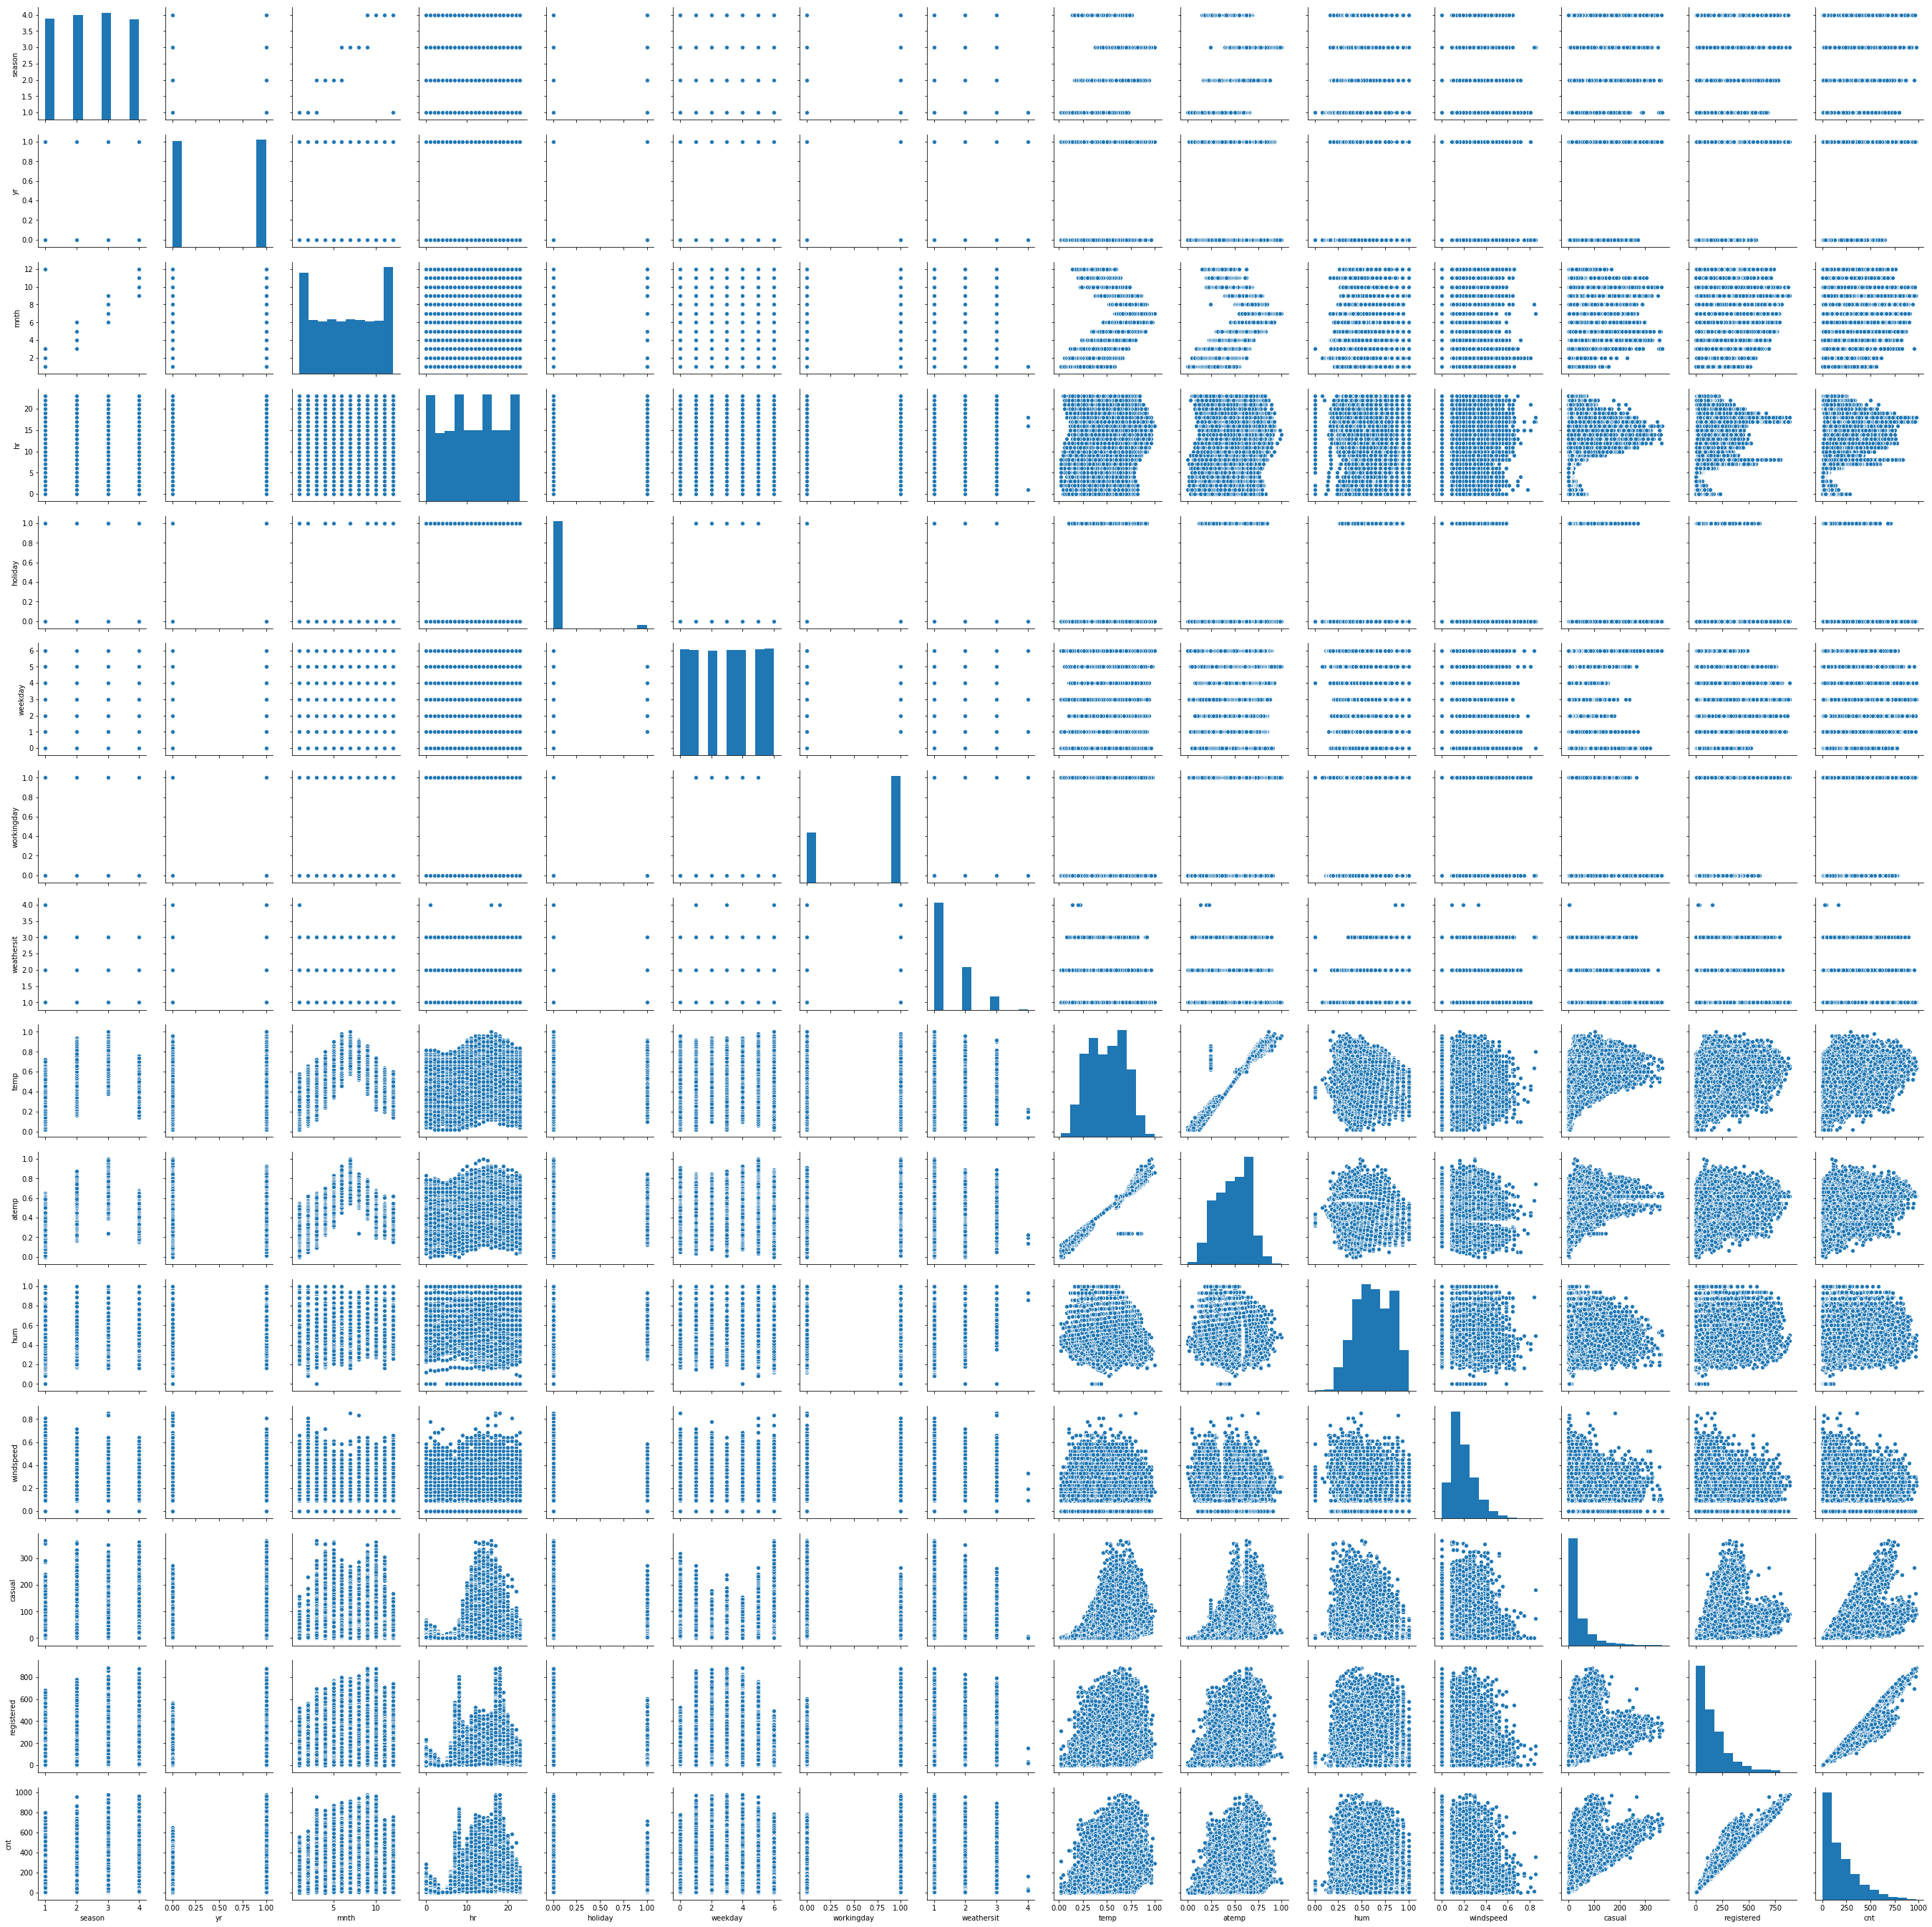

In [12]:
# inspect 
sns.pairplot(df)
plt.savefig('s_pariplot_complete.png')

This gives us a nice overview of some relationships between variables. Interesting relationships are:

* season: negative quadratic relationship
* yr: increase
* hr: two peaks; create dummies; bin?
* month: similar to season we observe a negative quadratic relationship
* holiday: during holidays customers seem to use the bike sharing less frequently
* weekday: the mean is pretty stable over all of the weekdays but the distribution changes slightly
* workingday: rather the same
* weathersit: cnt is decreasing in weathersit; the relationship might even be of the relationship 1/sqrt(x) type
* temp: there is a relationship and it seems to be linear
* atemp: there is a relationship and it seems to be linear
* hum: very week relationship between humidity and cnt; statistically significant?
* windspead: same as hum

The following boxplots also helped with that.

What about the relationship between holidays and cnt:

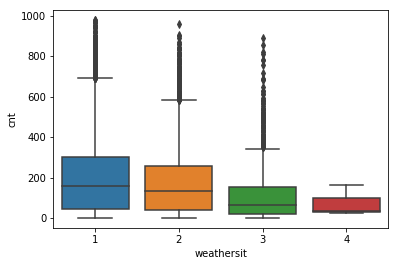

In [13]:
# let's look at a boxplot for cnt and year
sns.boxplot(x="weathersit", y="cnt", data=df)

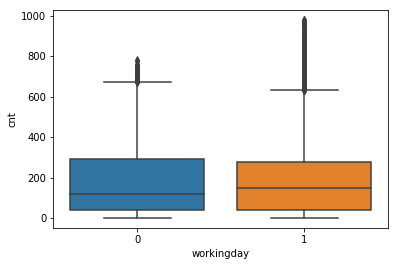

In [14]:
# let's look at a boxplot for cnt and year
sns.boxplot(x=df['workingday'], y="cnt", data=df)

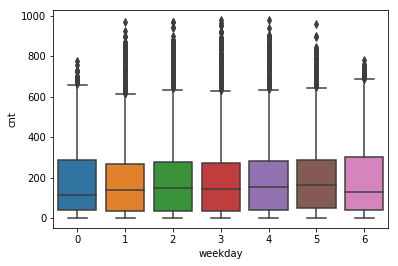

In [15]:
sns.boxplot(x=df['weekday'], y="cnt", data=df)

In [16]:
# displays the month in which the holidays are
df[df['holiday'] == 1].groupby(df.dteday.dt.month)['dteday'].count()

dteday
1     71
2     47
4     48
5     48
7     48
9     48
10    48
11    96
12    46
Name: dteday, dtype: int64

In [17]:
# Compute the correlation matrix
corr = df.corr()

In [18]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

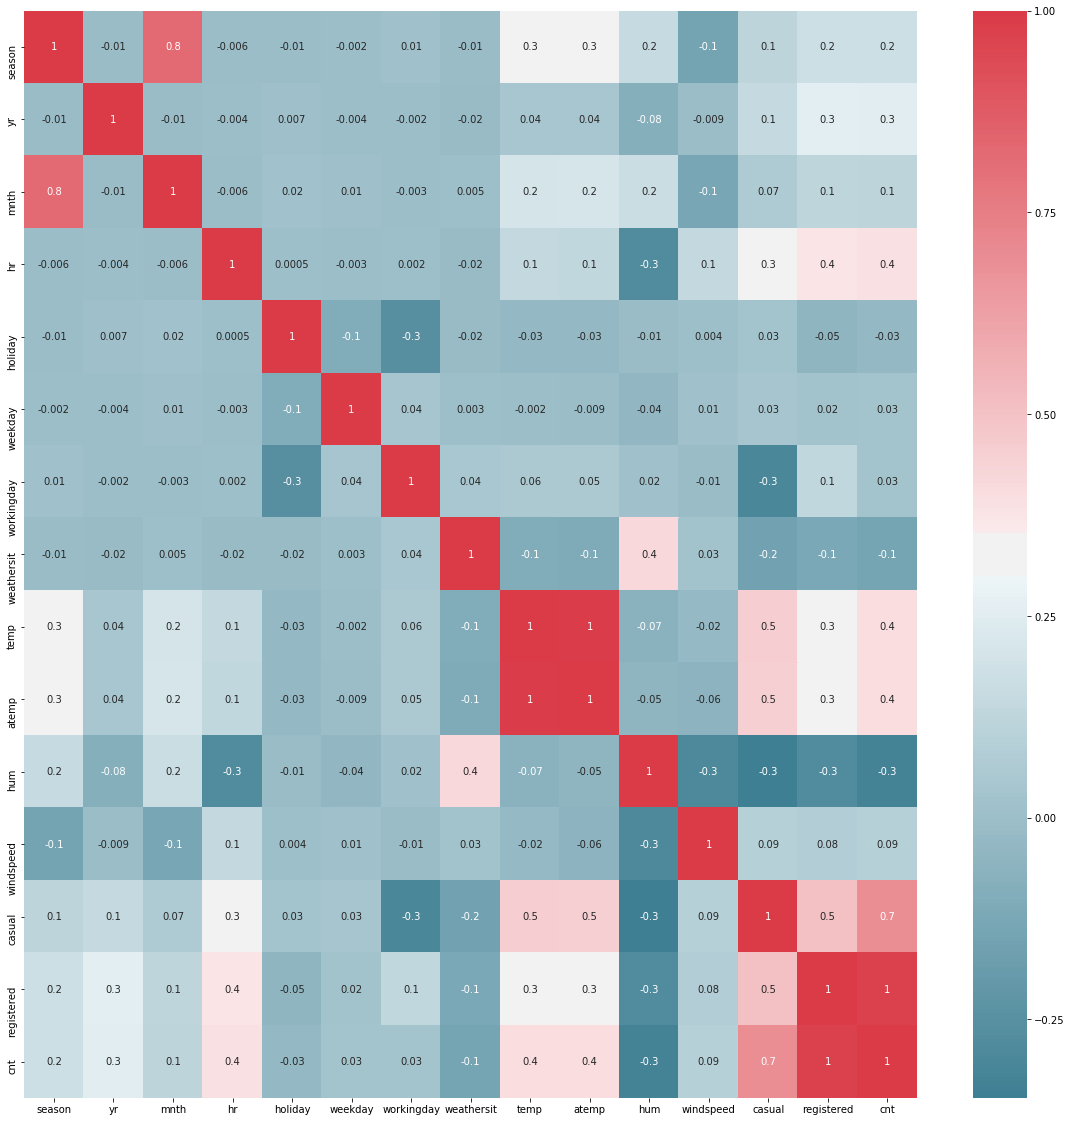

In [19]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap=cmap, annot=True, fmt='.1g')

We observe high correlations among the following input variables (casual, registered and cnt are for now considered as output variables):

* season and month: I would exclude season from the model because month might catch more granular data
* weathersit and hum: maybe only include one
* temp and atemp: linearly dependent; just chose atemp, the feeling temperature

In [20]:
# plot a graph of registered and date
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


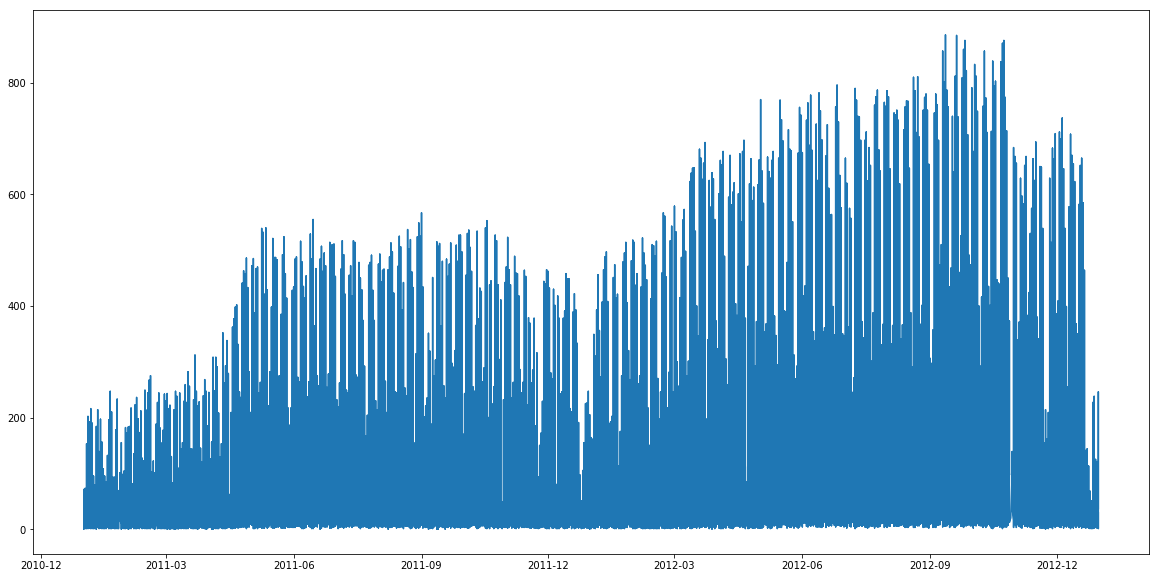

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df['dteday'], df['registered'])
#plt.plot(df['dteday'], df['casual'])
#plt.plot(df['dteday'], df['cnt'])
#plt.xticks(rotation='vertical')

* Total rentals seem to be made up by registered rentals only in winter. In summer casual rentals kick in.

## Regress on the single predictors to inspect the relationship between the predictors and the predicted value

In [26]:
np.array(df['hum']).reshape(1, -1)

array([[0.81, 0.8 , 0.8 , ..., 0.6 , 0.56, 0.65]])

In [39]:
for x in df.iloc[0:1, 1:-3]:
    m = LinearRegression()
    X = np.array(df[x]).reshape(-1, 1)
    y = df['cnt']
    m.fit(X, y)
    print('The score for the regression of {} is {}'.format(x, m.score(X, y)))

The score for the regression of season is 0.031703843335774695
The score for the regression of yr is 0.06274769435470695
The score for the regression of mnth is 0.014553469189245827
The score for the regression of hr is 0.155292345364892
The score for the regression of holiday is 0.0009564980862623029
The score for the regression of weekday is 0.0007236024675265629
The score for the regression of workingday is 0.0009171429298904244
The score for the regression of weathersit is 0.020285204824932013
The score for the regression of temp is 0.16384059523903416
The score for the regression of atemp is 0.16074430690746522
The score for the regression of hum is 0.10427134653986614
The score for the regression of windspeed is 0.008692538465183475


# Look for anomalies

In [45]:
list(np.linspace(0.1, 1, 10))

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [51]:
df.casual.describe(percentiles=[.10, .20, .40, .60, .80, .90, .95, .99])

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
10%          1.000000
20%          3.000000
40%         10.000000
50%         17.000000
60%         26.000000
80%         59.000000
90%         92.000000
95%        138.100000
99%        240.000000
max        367.000000
Name: casual, dtype: float64

In [50]:
df[df.casual > 1000].count()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64